In [154]:
from itertools import zip_longest
steps = 0
DEBUG = False

def log(s):
    global DEBUG
    if DEBUG:
        print(s)

def add_digits(a,b):
    global steps, debug
    steps += 1
    result = (a+b)%10
    carry = (a+b)//10
    log("added digits {}+{}; result {} w/ carry {} [#{}]".format(a, b, result, carry, steps))
    return carry, result

def mul_digits(a,b):
    global steps, debug
    steps += 1
    result = (a*b)%10
    carry = (a*b)//10
    log("multiplied digits {}*{}; result {} w/ carry {} [#{}]".format(a, b, result, carry, steps))
    return carry, result

def to_dig(num):
    return list(map(int, str(num)))

def to_int(dig):
    return int("".join(map(str, dig)))

def add(x,y):
    global steps
    
    carry = 0
    result = []
    
    for a, b in zip_longest(x[::-1], y[::-1], fillvalue=0): # iterate through pairs of digits (backwards)
        carry1, res = add_digits(a, b)          # add digits
        carry2, res = add_digits(carry, res)    # add previous carry
        result.append(res)                      # add to result
        carry = carry1 + carry2                 # set new carry
    
    if carry:
        result.append(carry)
    result.reverse()
    
    steps += 1
    log("added {}+{}; result {} [#{}]".format(s(x), s(y), s(result), steps))
    return result

def mul(x,y):
    global steps
    nums = []
    
    for a in x[::-1]:
        carry = 0
        num = []
        for b in y[::-1]:
            carry1, res = mul_digits(a, b)
            carry2, res = add_digits(carry, res)
            num.append(res)
            carry = carry1 + carry2
        
        if carry:
            num.append(carry)
        num.reverse()
        nums.append(num)
    
    result = nums[0]
    for i, num in enumerate(nums[1:]):
        result = add(result, num + [0]*(i+1))
    
    steps += 1
    log("multiplied {}*{}; result {} [#{}]".format(s(x), s(y), s(result), steps))
    return result
    
def mul_recur(x,y):
    global steps
    if len(x) == 0 or len(y) == 0:
        steps += 1
        return [0]
    elif len(x) == 1 and len(y) == 1:
        steps += 1
        return list(mul_digits(x[0], y[0]))
    
    n = max(len(x)//2, len(y)//2)
    
    A = x[:-n]   # first half of x
    B = x[-n:]   # second half of x
    C = y[:-n]   # first half of y
    D = y[-n:]   # second half of y
    
    result = mul_recur(B, D)
    result = add(mul_recur(A, D) + [0]*n, result)
    result = add(mul_recur(B, C) + [0]*n, result)
    result = add(mul_recur(A, C) + [0]*(2*n), result)
    
    steps += 1
    log("multiplied {}*{}; result {} [#{}]".format(s(x), s(y), s(result), steps))
    return result

In [153]:
print(add([1,3],[6,8]))

added digits 3+8; result 1 w/ carry 1 [#149]
added digits 0+1; result 1 w/ carry 0 [#150]
added digits 1+6; result 7 w/ carry 0 [#151]
added digits 1+7; result 8 w/ carry 0 [#152]
added 13+68; result 81 [#153]
[8, 1]


In [159]:
DEBUG = False
print(mul_recur(to_dig(33333), to_dig(1)))

[0, 3, 3, 3, 3, 3]


In [141]:
DEBUG = False
print(mul(to_dig(3), to_dig(1000)))

[3, 0, 0, 0]


In [21]:
7402*7628

56462456

In [138]:
def trim(l):
    for i in range(len(l)):
        if l[i] > 0:
            return l[i:]
    return []

<IPython.core.display.Javascript object>


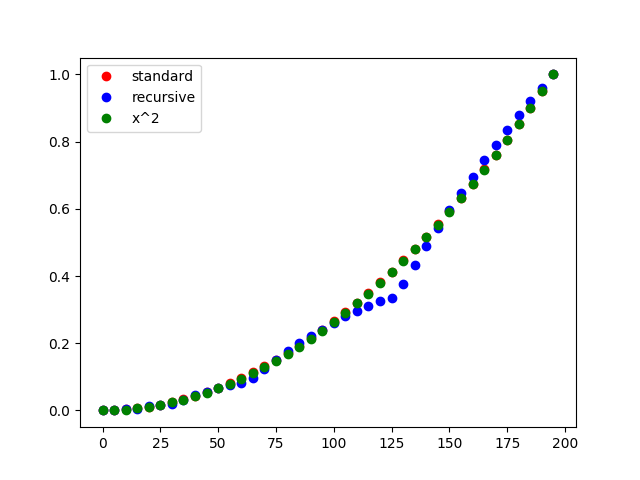

In [158]:
DEBUG = False
from random import randrange
import numpy as np

x = list(range(0,200,5))
y_mul = []
y_mul_recur = []

for n in x:
    a = to_dig(randrange(10**n,10**(n+1)))
    b = to_dig(randrange(10**n,10**(n+1)))
    
    steps = 0
    out1 = mul(a, b)
    y_mul.append(steps)
    
    steps = 0
    out2 = mul_recur(a, b)
    y_mul_recur.append(steps)
    
    assert(trim(out1) == trim(out2))

x = np.array(x)
y_mul = np.array(y_mul)
y_mul_recur = np.array(y_mul_recur)

from matplotlib import pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(x, y_mul/max(y_mul), 'ro', label="standard")
ax.plot(x, y_mul_recur/max(y_mul_recur), 'bo', label="recursive")
ax.plot(x, x**2/max(x**2), 'go', label="x^2")
ax.legend()


In [95]:
y_mul

[2, 2154, 8340, 18518, 32622, 50874, 72964, 99208, 129382, 163548]